In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
coordinates

[(-6.011817463464226, 87.99378620135764),
 (76.8290676885191, 111.85246196607977),
 (-25.726914938410204, 128.11897593712047),
 (-1.6327606471378004, -159.70181921649447),
 (32.209494278773946, -138.40719136292245),
 (-1.685849282888583, 114.11946935655641),
 (-76.03612991979776, -142.02834119340622),
 (-53.2303767181138, 49.778450562872735),
 (37.90220541476769, -28.36831253233109),
 (12.955947111941171, 165.40605747613375),
 (69.24595603134236, 88.5452740774897),
 (-32.404353931235676, 157.9440311693616),
 (-19.824542975644107, -160.313175714267),
 (-35.597743633454826, -170.11197511034547),
 (-20.439993386996107, 114.20163730365044),
 (-11.848572922979557, -114.53003457341),
 (-54.10490023896802, 103.01171617587812),
 (-64.51162857981271, 16.811981586537286),
 (56.45116527020042, 108.90635094042159),
 (44.09444159842914, 131.41314379784103),
 (44.70070947705207, -22.481794024849933),
 (29.62048074202049, 130.97622093836935),
 (-30.36540740784143, 163.59675270764916),
 (80.7976180463

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key



In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=60baff37fd83de98e73d6ceca315e320


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    # print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    #print(city_url)
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        print("City Weather")
        print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    except:
        print("City not found. Skipping...")
        continue
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
City Weather
{'coord': {'lon': 96.13, 'lat': 4.14}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.31, 'feels_like': 91.8, 'temp_min': 84.31, 'temp_max': 84.31, 'pressure': 1009, 'humidity': 71, 'sea_level': 1009, 'grnd_level': 1009}, 'wind': {'speed': 3.91, 'deg': 235}, 'clouds': {'all': 79}, 'dt': 1583040571, 'sys': {'country': 'ID', 'sunrise': 1583020009, 'sunset': 1583063349}, 'timezone': 25200, 'id': 1214488, 'name': 'Meulaboh', 'cod': 200}
City Weather
{'coord': {'lon': 114.08, 'lat': 71.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.44, 'feels_like': -11.42, 'temp_min': 2.44, 'temp_max': 2.44, 'pressure': 1023, 'humidity': 90, 'sea_level': 1023, 'grnd_level': 1013}, 'wind': {'speed': 13.42, 'deg': 273}, 'clouds': {'all': 77}, 'dt': 1583040571, 'sys': 

City Weather
{'coord': {'lon': 20.04, 'lat': -34.53}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 61.99, 'feels_like': 61.92, 'temp_min': 60.8, 'temp_max': 64, 'pressure': 1014, 'humidity': 87}, 'wind': {'speed': 4.7, 'deg': 110}, 'clouds': {'all': 35}, 'dt': 1583040574, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1583036857, 'sunset': 1583083019}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
City Weather
{'coord': {'lon': 109.32, 'lat': 55.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 15.82, 'feels_like': 8.76, 'temp_min': 15.82, 'temp_max': 15.82, 'pressure': 1026, 'humidity': 82, 'sea_level': 1026, 'grnd_level': 969}, 'wind': {'speed': 2.42, 'deg': 5}, 'clouds': {'all': 19}, 'dt': 1583040574, 'sys': {'country': 'RU', 'sunrise': 1583019226, 'sunset': 1583057801}, 'timezone': 2880

City Weather
{'coord': {'lon': 114.16, 'lat': 22.29}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 79.5, 'feels_like': 81.64, 'temp_min': 73.4, 'temp_max': 86, 'pressure': 1015, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 260}, 'clouds': {'all': 20}, 'dt': 1583040493, 'sys': {'type': 1, 'id': 9154, 'country': 'HK', 'sunrise': 1583016280, 'sunset': 1583058424}, 'timezone': 28800, 'id': 1819729, 'name': 'Hong Kong', 'cod': 200}
City Weather
{'coord': {'lon': 27.91, 'lat': -33.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 63.32, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1018, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1583040307, 'sys': {'type': 1, 'id': 1912, 'country': 'ZA', 'sunrise': 1583035040, 'sunset': 1583081058},

City Weather
{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.99, 'feels_like': 60.93, 'temp_min': 66.99, 'temp_max': 66.99, 'pressure': 1016, 'humidity': 86}, 'wind': {'speed': 18.43, 'deg': 48}, 'clouds': {'all': 0}, 'dt': 1583040580, 'sys': {'type': 3, 'id': 2011314, 'country': 'ZA', 'sunrise': 1583035258, 'sunset': 1583081330}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
City Weather
{'coord': {'lon': 125.39, 'lat': 58.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 7.34, 'feels_like': -0.85, 'temp_min': 7.34, 'temp_max': 7.34, 'pressure': 1024, 'humidity': 84, 'sea_level': 1024, 'grnd_level': 917}, 'wind': {'speed': 3.62, 'deg': 293}, 'clouds': {'all': 100}, 'dt': 1583040580, 'sys': {'country': 'RU', 'sunrise': 1583015670, 'sunset': 1583053645}, 'timezone': 

City Weather
{'coord': {'lon': 41.64, 'lat': 51.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 33.31, 'feels_like': 24.58, 'temp_min': 33.31, 'temp_max': 33.31, 'pressure': 1021, 'humidity': 77, 'sea_level': 1021, 'grnd_level': 1004}, 'wind': {'speed': 7.94, 'deg': 243}, 'clouds': {'all': 0}, 'dt': 1583040585, 'sys': {'country': 'RU', 'sunrise': 1583035113, 'sunset': 1583074396}, 'timezone': 10800, 'id': 483341, 'name': 'Ternovka', 'cod': 200}
City Weather
{'coord': {'lon': -6.71, 'lat': 41.34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 47.34, 'feels_like': 36.61, 'temp_min': 47.34, 'temp_max': 47.34, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 935}, 'wind': {'speed': 16.8, 'deg': 237}, 'rain': {'3h': 1}, 'clouds': {'all': 99}, 'dt': 1583040585, 'sys': {'country': 'PT', 'sunrise': 1583046063, 'sunset': 1

City Weather
{'coord': {'lon': 34.76, 'lat': 31.61}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 54.99, 'feels_like': 44.58, 'temp_min': 46, 'temp_max': 59, 'pressure': 1016, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1583040589, 'sys': {'type': 1, 'id': 6845, 'country': 'IL', 'sunrise': 1583035676, 'sunset': 1583077135}, 'timezone': 7200, 'id': 293842, 'name': 'Kiryat Gat', 'cod': 200}
City Weather
{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.47, 'feels_like': 48.2, 'temp_min': 48.99, 'temp_max': 57.99, 'pressure': 1015, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1583040589, 'sys': {'type': 1, 'id': 6896, 'country': 'PT', 'sunrise': 1583046392, 'sunset': 1583087

City Weather
{'coord': {'lon': 93.45, 'lat': 42.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 44.74, 'feels_like': 36.34, 'temp_min': 44.74, 'temp_max': 44.74, 'pressure': 1027, 'humidity': 26, 'sea_level': 1027, 'grnd_level': 914}, 'wind': {'speed': 4.9, 'deg': 231}, 'clouds': {'all': 0}, 'dt': 1583040591, 'sys': {'country': 'CN', 'sunrise': 1583022129, 'sunset': 1583062515}, 'timezone': 28800, 'id': 1529484, 'name': 'Kumul', 'cod': 200}
City Weather
{'coord': {'lon': -63.06, 'lat': 18.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.14, 'feels_like': 76.12, 'temp_min': 75, 'temp_max': 77, 'pressure': 1019, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 12.48, 'deg': 111}, 'clouds': {'all': 20}, 'dt': 1583040592, 'sys': {'type': 1, 'id': 8801, 'country': 'AI', 'sunrise': 1583058651, 'sunset': 1583101107}, 'timezon

City Weather
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
City Weather
{'coord': {'lon': 27.57, 'lat': -28.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 58.48, 'feels_like': 56.34, 'temp_min': 58.48, 'temp_max': 58.48, 'pressure': 1021, 'humidity': 72, 'sea_level': 1021, 'grnd_level': 843}, 'wind': {'speed': 3.69, 'deg': 52}, 'clouds': {'all': 0}, 'dt': 1583040595, 'sys': {'country': 'ZA', 'sunrise': 1583035308, 'sunset': 1583080954}, 'timezone': 7200, 'id': 1013266, 'name': 'Clocolan', 'cod': 200}
City Weather
{'coord': {'lon': 160.7, 'lat': -8.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.85, 'feels_like': 94.71, 'temp_min': 86.85, 'temp_max': 86.85, 'pressure': 1007, 'humidity': 63, 'sea_level': 1007, 'grnd_level': 1006}, 'wind': {'speed': 2.1, 'deg': 119}, 'clouds': {'all': 52}, 'dt': 1

City Weather
{'coord': {'lon': -98.73, 'lat': 16.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.18, 'feels_like': 79.23, 'temp_min': 73.18, 'temp_max': 73.18, 'pressure': 1018, 'humidity': 88, 'sea_level': 1018, 'grnd_level': 1010}, 'wind': {'speed': 2.3, 'deg': 29}, 'clouds': {'all': 2}, 'dt': 1583040598, 'sys': {'country': 'MX', 'sunrise': 1582980798, 'sunset': 1583023303}, 'timezone': -21600, 'id': 3532490, 'name': 'Azoyú', 'cod': 200}
City Weather
{'coord': {'lon': 102.5, 'lat': 71.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.28, 'feels_like': -10.97, 'temp_min': 2.28, 'temp_max': 2.28, 'pressure': 1025, 'humidity': 93, 'sea_level': 1025, 'grnd_level': 1022}, 'wind': {'speed': 12.39, 'deg': 223}, 'clouds': {'all': 89}, 'dt': 1583040598, 'sys': {'country': 'RU', 'sunrise': 1583023588, 'sunset': 1583056713}, 't

City Weather
{'coord': {'lon': -66.77, 'lat': -18.9}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.63, 'feels_like': 41.86, 'temp_min': 50.63, 'temp_max': 50.63, 'pressure': 1021, 'humidity': 72, 'sea_level': 1021, 'grnd_level': 656}, 'wind': {'speed': 12.3, 'deg': 338}, 'clouds': {'all': 92}, 'dt': 1583040601, 'sys': {'country': 'BO', 'sunrise': 1583058350, 'sunset': 1583103189}, 'timezone': -14400, 'id': 3921355, 'name': 'Challapata', 'cod': 200}
City Weather
{'coord': {'lon': 145.77, 'lat': -16.92}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.6, 'feels_like': 86.92, 'temp_min': 82, 'temp_max': 91.4, 'pressure': 1008, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 90}, 'clouds': {'all': 27}, 'dt': 1583040601, 'sys': {'type': 1, 'id': 9490, 'country': 'AU', 'sunrise': 1583007401, 'sunset

City Weather
{'coord': {'lon': -60.67, 'lat': 2.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 80.37, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1013, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 90}, 'clouds': {'all': 72}, 'dt': 1583040604, 'sys': {'type': 1, 'id': 8340, 'country': 'BR', 'sunrise': 1583057592, 'sunset': 1583101019}, 'timezone': -14400, 'id': 3664980, 'name': 'Boa Vista', 'cod': 200}
City Weather
{'coord': {'lon': 50.33, 'lat': 40.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 35.11, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1013, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 300}, 'clouds': {'all': 90}, 'dt': 1583040604, 'sys': {'type': 1, 'id': 8841, 'country': 'AZ', 'sunrise': 1583032344, 'sunset'

City Weather
{'coord': {'lon': -39.25, 'lat': -17.71}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.49, 'feels_like': 87.17, 'temp_min': 80.49, 'temp_max': 80.49, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 1013}, 'wind': {'speed': 4.5, 'deg': 20}, 'clouds': {'all': 38}, 'dt': 1583040607, 'sys': {'country': 'BR', 'sunrise': 1583051786, 'sunset': 1583096545}, 'timezone': -10800, 'id': 3466980, 'name': 'Caravelas', 'cod': 200}
City Weather
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
City Weather
{'coord': {'lon': 122.38, 'lat': 37.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.19, 'feels_like': 32.45, 'temp_min': 44.19, 'temp_max': 44.19, 'pressure': 1020, 'humidity': 68, 'sea_level': 1020, 'grnd_level': 1019}, 'wind': {'speed': 15.12, 'deg': 328}, 'clouds': {'

City Weather
{'coord': {'lon': 146.42, 'lat': 68.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 2.73, 'feels_like': -6.54, 'temp_min': 2.73, 'temp_max': 2.73, 'pressure': 1023, 'humidity': 77, 'sea_level': 1023, 'grnd_level': 1016}, 'wind': {'speed': 5.08, 'deg': 248}, 'clouds': {'all': 0}, 'dt': 1583040609, 'sys': {'country': 'RU', 'sunrise': 1583012167, 'sunset': 1583047055}, 'timezone': 39600, 'id': 2126785, 'name': 'Belaya Gora', 'cod': 200}
City Weather
{'coord': {'lon': 124.89, 'lat': -9.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.4, 'feels_like': 89.33, 'temp_min': 84.4, 'temp_max': 84.4, 'pressure': 1006, 'humidity': 66, 'sea_level': 1006, 'grnd_level': 972}, 'wind': {'speed': 6.42, 'deg': 285}, 'clouds': {'all': 88}, 'dt': 1583040610, 'sys': {'country': 'ID', 'sunrise': 1583012682, 'sunset': 1583056873}, 

City Weather
{'coord': {'lon': 1.64, 'lat': 16.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.48, 'feels_like': 58.23, 'temp_min': 70.48, 'temp_max': 70.48, 'pressure': 1011, 'humidity': 11, 'sea_level': 1011, 'grnd_level': 971}, 'wind': {'speed': 11.92, 'deg': 67}, 'clouds': {'all': 0}, 'dt': 1583040612, 'sys': {'country': 'ML', 'sunrise': 1583043078, 'sunset': 1583085628}, 'timezone': 0, 'id': 2457161, 'name': 'Gao', 'cod': 200}
City Weather
{'coord': {'lon': 101.71, 'lat': 26.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.93, 'feels_like': 72.9, 'temp_min': 76.93, 'temp_max': 76.93, 'pressure': 1010, 'humidity': 24, 'sea_level': 1010, 'grnd_level': 840}, 'wind': {'speed': 2.35, 'deg': 51}, 'clouds': {'all': 0}, 'dt': 1583040612, 'sys': {'country': 'CN', 'sunrise': 1583019424, 'sunset': 1583061256}, 'timezone': 28800, 

City Weather
{'coord': {'lon': 122.67, 'lat': 11}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.17, 'feels_like': 86.22, 'temp_min': 85.17, 'temp_max': 85.17, 'pressure': 1009, 'humidity': 60, 'sea_level': 1009, 'grnd_level': 994}, 'wind': {'speed': 11.43, 'deg': 36}, 'clouds': {'all': 69}, 'dt': 1583040615, 'sys': {'country': 'PH', 'sunrise': 1583013859, 'sunset': 1583056761}, 'timezone': 28800, 'id': 1714733, 'name': 'Dingle', 'cod': 200}
City Weather
{'coord': {'lon': 25.95, 'lat': -2.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 74.23, 'feels_like': 82.53, 'temp_min': 74.23, 'temp_max': 74.23, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 956}, 'wind': {'speed': 1.05, 'deg': 353}, 'rain': {'3h': 0.31}, 'clouds': {'all': 83}, 'dt': 1583040615, 'sys': {'country': 'CD', 'sunrise': 1583036626, 'sunse

City Weather
{'coord': {'lon': 28.17, 'lat': 38.83}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 36.34, 'feels_like': 31.01, 'temp_min': 36.34, 'temp_max': 36.34, 'pressure': 1021, 'humidity': 81, 'sea_level': 1021, 'grnd_level': 955}, 'wind': {'speed': 2.89, 'deg': 86}, 'clouds': {'all': 48}, 'dt': 1583040617, 'sys': {'country': 'TR', 'sunrise': 1583037576, 'sunset': 1583078398}, 'timezone': 10800, 'id': 304825, 'name': 'Manisa Province', 'cod': 200}
City Weather
{'coord': {'lon': -147.72, 'lat': 64.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -1.32, 'feels_like': -10.34, 'temp_min': -5.8, 'temp_max': 3.99, 'pressure': 999, 'humidity': 76}, 'visibility': 16093, 'wind': {'speed': 4.36, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1583040617, 'sys': {'type': 1, 'id': 7684, 'country': 'US', 'sunrise': 1582995695, 'sunse

City Weather
{'coord': {'lon': 14.28, 'lat': 53.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 40.48, 'feels_like': 30.25, 'temp_min': 39, 'temp_max': 42.01, 'pressure': 997, 'humidity': 81}, 'wind': {'speed': 12.66, 'deg': 204}, 'clouds': {'all': 8}, 'dt': 1583040620, 'sys': {'type': 3, 'id': 2008656, 'country': 'DE', 'sunrise': 1583041777, 'sunset': 1583080864}, 'timezone': 3600, 'id': 2834629, 'name': 'Schwedt', 'cod': 200}
City Weather
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
City Weather
{'coord': {'lon': -49.67, 'lat': 61.99}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -3.05, 'feels_like': -13.83, 'temp_min': -3.05, 'temp_max': -3.05, 'pressure': 1001, 'humidity': 54, 'sea_level': 1001, 'grnd_level': 986}, 'wind': {'speed': 7.09, 'deg': 21}, 'clouds': {'all': 0}, 'dt': 1583040621, 'sys': {'c

City Weather
{'coord': {'lon': 73.07, 'lat': 6.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.58, 'feels_like': 86.63, 'temp_min': 82.58, 'temp_max': 82.58, 'pressure': 1012, 'humidity': 73, 'sea_level': 1012, 'grnd_level': 1012}, 'wind': {'speed': 9.19, 'deg': 94}, 'clouds': {'all': 50}, 'dt': 1583040624, 'sys': {'country': 'MV', 'sunrise': 1583025620, 'sunset': 1583068805}, 'timezone': 18000, 'id': 1337613, 'name': 'Kulhudhuffushi', 'cod': 200}
City Weather
{'coord': {'lon': 139.92, 'lat': 53.94}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 9.01, 'feels_like': 1.83, 'temp_min': 9.01, 'temp_max': 9.01, 'pressure': 1026, 'humidity': 91, 'sea_level': 1026, 'grnd_level': 984}, 'wind': {'speed': 2.17, 'deg': 357}, 'clouds': {'all': 73}, 'dt': 1583040624, 'sys': {'country': 'RU', 'sunrise': 1583011744, 'sunset': 1583

City Weather
{'coord': {'lon': -121.13, 'lat': 36.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 46.35, 'feels_like': 36.91, 'temp_min': 41, 'temp_max': 50, 'pressure': 1019, 'humidity': 66}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 290}, 'clouds': {'all': 20}, 'dt': 1583040493, 'sys': {'type': 1, 'id': 5885, 'country': 'US', 'sunrise': 1582986932, 'sunset': 1583027920}, 'timezone': -28800, 'id': 5363208, 'name': 'King City', 'cod': 200}
City Weather
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
City Weather
{'coord': {'lon': 1.98, 'lat': 7.93}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.97, 'feels_like': 83.14, 'temp_min': 75.97, 'temp_max': 75.97, 'pressure': 1009, 'humidity': 91, 'sea_level': 1009, 'grnd_level': 988}, 'wind': {'speed': 3.78, 'deg': 166}, 'clouds': {'all': 95}

City Weather
{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.36, 'feels_like': 62.28, 'temp_min': 63, 'temp_max': 69.8, 'pressure': 1021, 'humidity': 68}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 50}, 'clouds': {'all': 1}, 'dt': 1583040632, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1582994794, 'sunset': 1583037019}, 'timezone': -36000, 'id': 5847411, 'name': 'Kahului', 'cod': 200}
City Weather
{'coord': {'lon': 20.44, 'lat': -34.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 60.33, 'temp_min': 60.8, 'temp_max': 60.8, 'pressure': 1014, 'humidity': 87}, 'wind': {'speed': 4.7, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1583040632, 'sys': {'type': 1, 'id': 1966, 'country': 'ZA', 'sunrise': 1583036786, 'sunset': 1583082898}, 'timezone': 7200, 'id'

City Weather
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
City Weather
{'coord': {'lon': -109.91, 'lat': 22.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.13, 'feels_like': 58.55, 'temp_min': 61, 'temp_max': 66, 'pressure': 1019, 'humidity': 55}, 'visibility': 12874, 'wind': {'speed': 8.97, 'deg': 332}, 'clouds': {'all': 5}, 'dt': 1583040635, 'sys': {'type': 1, 'id': 7165, 'country': 'MX', 'sunrise': 1582983698, 'sunset': 1583025769}, 'timezone': -25200, 'id': 3985710, 'name': 'Cabo San Lucas', 'cod': 200}
City Weather
{'coord': {'lon': -46.05, 'lat': 60.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 5, 'feels_like': -4.41, 'temp_min': 5, 'temp_max': 5, 'pressure': 993, 'humidity': 38}, 'wind': {'speed': 4.7, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1583040635, 'sys': {'type': 1, 'id': 47, 'country

City Weather
{'coord': {'lon': 158.65, 'lat': 53.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 23.88, 'temp_min': 32, 'temp_max': 32, 'pressure': 1012, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 170}, 'clouds': {'all': 61}, 'dt': 1583040638, 'sys': {'type': 1, 'id': 8887, 'country': 'RU', 'sunrise': 1583007182, 'sunset': 1583046171}, 'timezone': 43200, 'id': 2122104, 'name': 'Petropavlovsk-Kamchatskiy', 'cod': 200}
City Weather
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
City Weather
{'coord': {'lon': 43.16, 'lat': 57.14}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 25.32, 'feels_like': 13.46, 'temp_min': 25.32, 'temp_max': 25.32, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 998}, 'wind': {'speed': 11.99, 'deg': 245}, 'clo

City Weather
{'coord': {'lon': -1.95, 'lat': 37.39}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.25, 'feels_like': 40.78, 'temp_min': 45, 'temp_max': 48.99, 'pressure': 1012, 'humidity': 80}, 'wind': {'speed': 8.01, 'deg': 237, 'gust': 17}, 'clouds': {'all': 100}, 'dt': 1583040641, 'sys': {'type': 3, 'id': 2004018, 'country': 'ES', 'sunrise': 1583044729, 'sunset': 1583085700}, 'timezone': 3600, 'id': 2516542, 'name': 'Huercal Overa', 'cod': 200}
City Weather
{'coord': {'lon': 177.48, 'lat': 64.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -13, 'feels_like': -27.36, 'temp_min': -13, 'temp_max': -13, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 13.42, 'deg': 10, 'gust': 15.66}, 'clouds': {'all': 0}, 'dt': 1583040641, 'sys': {'type': 1, 'id': 8872, 'country': 'RU', 'sunrise': 1583004011, 'sun

City Weather
{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.28, 'feels_like': 78.89, 'temp_min': 71.6, 'temp_max': 73, 'pressure': 1018, 'humidity': 94}, 'visibility': 19312, 'wind': {'speed': 2.24, 'deg': 20}, 'clouds': {'all': 5}, 'dt': 1583040644, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise': 1582982489, 'sunset': 1583024718}, 'timezone': -21600, 'id': 4004293, 'name': 'Ixtapa', 'cod': 200}
City Weather
{'coord': {'lon': 15.06, 'lat': -7.61}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.79, 'feels_like': 68.41, 'temp_min': 65.79, 'temp_max': 65.79, 'pressure': 1015, 'humidity': 97, 'sea_level': 1015, 'grnd_level': 921}, 'wind': {'speed': 4.65, 'deg': 138}, 'clouds': {'all': 100}, 'dt': 1583040644, 'sys': {'country': 'AO', 'sunrise': 1583039091, 'sunset': 1583083175},

City Weather
{'coord': {'lon': 114.97, 'lat': -8.19}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 93.79, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1007, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 250}, 'clouds': {'all': 40}, 'dt': 1583040315, 'sys': {'type': 1, 'id': 9333, 'country': 'ID', 'sunrise': 1583015093, 'sunset': 1583059223}, 'timezone': 28800, 'id': 1650232, 'name': 'Banjar', 'cod': 200}
City Weather
{'coord': {'lon': -122.42, 'lat': 37.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.1, 'feels_like': 27.14, 'temp_min': 46, 'temp_max': 52, 'pressure': 1017, 'humidity': 66}, 'visibility': 16093, 'wind': {'speed': 34.45, 'deg': 270, 'gust': 47.2}, 'clouds': {'all': 90}, 'dt': 1583040387, 'sys': {'type': 1, 'id': 5817, 'country': 'US', 'sunrise': 15829

City Weather
{'coord': {'lon': 144.47, 'lat': -38.18}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.93, 'feels_like': 83.1, 'temp_min': 87.8, 'temp_max': 90, 'pressure': 1003, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 350}, 'clouds': {'all': 40}, 'dt': 1583040486, 'sys': {'type': 1, 'id': 9541, 'country': 'AU', 'sunrise': 1583006783, 'sunset': 1583053374}, 'timezone': 39600, 'id': 2160336, 'name': 'Leopold', 'cod': 200}
City Weather
{'coord': {'lon': 33.45, 'lat': 69.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -22, 'feels_like': -30.24, 'temp_min': -22, 'temp_max': -22, 'pressure': 993, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 150}, 'clouds': {'all': 20}, 'dt': 1583040486, 'sys': {'type': 1, 'id': 8927, 'country': 'RU', 'sunrise': 1583039351, 'sunset': 1583074

City Weather
{'coord': {'lon': 10.17, 'lat': 46.22}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 35.08, 'feels_like': 27.12, 'temp_min': 26.6, 'temp_max': 41, 'pressure': 1004, 'humidity': 92}, 'visibility': 3400, 'wind': {'speed': 8.05, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1583040299, 'sys': {'type': 1, 'id': 6945, 'country': 'IT', 'sunrise': 1583042288, 'sunset': 1583082325}, 'timezone': 3600, 'id': 3165647, 'name': 'Tirano', 'cod': 200}
City Weather
{'coord': {'lon': -46.03, 'lat': 60.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 5, 'feels_like': -4.41, 'temp_min': 5, 'temp_max': 5, 'pressure': 993, 'humidity': 38}, 'wind': {'speed': 4.7, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1583040489, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 15830569

City Weather
{'coord': {'lon': 27.57, 'lat': -22.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.8, 'feels_like': 55.62, 'temp_min': 62.8, 'temp_max': 62.8, 'pressure': 1021, 'humidity': 68, 'sea_level': 1021, 'grnd_level': 913}, 'wind': {'speed': 13.94, 'deg': 66}, 'clouds': {'all': 79}, 'dt': 1583040492, 'sys': {'country': 'BW', 'sunrise': 1583035561, 'sunset': 1583080701}, 'timezone': 7200, 'id': 933137, 'name': 'Ratholo', 'cod': 200}
City Weather
{'coord': {'lon': 82.22, 'lat': 16.73}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.09, 'feels_like': 89.01, 'temp_min': 88.09, 'temp_max': 88.09, 'pressure': 1014, 'humidity': 43, 'sea_level': 1014, 'grnd_level': 1012}, 'wind': {'speed': 6.06, 'deg': 131}, 'clouds': {'all': 41}, 'dt': 1583040492, 'sys': {'country': 'IN', 'sunrise': 1583023751, 'sunset': 1583066283

City Weather
{'coord': {'lon': 9.45, 'lat': 4.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.13, 'feels_like': 87.96, 'temp_min': 78.13, 'temp_max': 78.13, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 999}, 'wind': {'speed': 0.89, 'deg': 335}, 'rain': {'3h': 0.44}, 'clouds': {'all': 51}, 'dt': 1583040495, 'sys': {'country': 'CM', 'sunrise': 1583040823, 'sunset': 1583084135}, 'timezone': 3600, 'id': 2229752, 'name': 'Kumba', 'cod': 200}
City Weather
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
City Weather
{'coord': {'lon': 100.18, 'lat': 25.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.02, 'feels_like': 58.5, 'temp_min': 66.02, 'temp_max': 66.02, 'pressure': 1012, 'humidity': 27, 'sea_level': 1012, 'grnd_level': 793}, 'wind': {'speed': 6.78, 'deg': 243}, 'clouds': {'all': 

City Weather
{'coord': {'lon': 42.46, 'lat': 37.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 43.03, 'feels_like': 35.56, 'temp_min': 43.03, 'temp_max': 43.03, 'pressure': 1010, 'humidity': 80, 'sea_level': 1010, 'grnd_level': 870}, 'wind': {'speed': 8.43, 'deg': 54}, 'rain': {'3h': 0.75}, 'clouds': {'all': 75}, 'dt': 1583040498, 'sys': {'country': 'TR', 'sunrise': 1583034087, 'sunset': 1583075028}, 'timezone': 10800, 'id': 300640, 'name': 'Şırnak', 'cod': 200}
City Weather
{'coord': {'lon': 31.68, 'lat': 59.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.95, 'feels_like': 19.31, 'temp_min': 29.95, 'temp_max': 29.95, 'pressure': 1000, 'humidity': 87, 'sea_level': 1000, 'grnd_level': 994}, 'wind': {'speed': 11.25, 'deg': 183}, 'clouds': {'all': 99}, 'dt': 1583040498, 'sys': {'country': 'RU', 'sunrise': 1583038173, 'su

City Weather
{'coord': {'lon': -102.2, 'lat': 17.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.99, 'feels_like': 79.23, 'temp_min': 73.99, 'temp_max': 73.99, 'pressure': 1017, 'humidity': 83, 'sea_level': 1017, 'grnd_level': 1005}, 'wind': {'speed': 2.93, 'deg': 141}, 'clouds': {'all': 0}, 'dt': 1583040501, 'sys': {'country': 'MX', 'sunrise': 1582981673, 'sunset': 1583024094}, 'timezone': -21600, 'id': 4026082, 'name': 'Lázaro Cárdenas', 'cod': 200}
City Weather
{'coord': {'lon': 98.78, 'lat': 1.74}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 90.18, 'feels_like': 98.1, 'temp_min': 90.18, 'temp_max': 90.18, 'pressure': 1009, 'humidity': 57, 'sea_level': 1009, 'grnd_level': 977}, 'wind': {'speed': 2.15, 'deg': 173}, 'rain': {'3h': 0.38}, 'clouds': {'all': 83}, 'dt': 1583040501, 'sys': {'country': 'ID', 'sunrise': 1583019297, 

City Weather
{'coord': {'lon': -123.21, 'lat': 39.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.4, 'feels_like': 35.26, 'temp_min': 36, 'temp_max': 48, 'pressure': 1017, 'humidity': 61}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 350}, 'clouds': {'all': 1}, 'dt': 1583040504, 'sys': {'type': 1, 'id': 6129, 'country': 'US', 'sunrise': 1582987573, 'sunset': 1583028277}, 'timezone': -28800, 'id': 5404476, 'name': 'Ukiah', 'cod': 200}
City Weather
{'coord': {'lon': 39, 'lat': 41.03}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 41.86, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1019, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1583040504, 'sys': {'type': 1, 'id': 6995, 'country': 'TR', 'sunrise': 1583035089, 'sunset': 1583

City Weather
{'coord': {'lon': 73.57, 'lat': 2.92}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.47, 'feels_like': 84.63, 'temp_min': 82.47, 'temp_max': 82.47, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 12.06, 'deg': 55}, 'clouds': {'all': 19}, 'dt': 1583040507, 'sys': {'country': 'MV', 'sunrise': 1583025384, 'sunset': 1583068802}, 'timezone': 18000, 'id': 1337617, 'name': 'Muli', 'cod': 200}
City Weather
{'coord': {'lon': -74.55, 'lat': 40.57}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 25.59, 'feels_like': 15.75, 'temp_min': 21, 'temp_max': 30.2, 'pressure': 1019, 'humidity': 45}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 320, 'gust': 17.22}, 'clouds': {'all': 40}, 'dt': 1583040507, 'sys': {'type': 1, 'id': 4686, 'country': 'US', 'sunrise': 1583062288, 'suns

City Weather
{'coord': {'lon': 141.88, 'lat': 39.27}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 37.22, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1015, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1583040510, 'sys': {'type': 1, 'id': 8047, 'country': 'JP', 'sunrise': 1583010334, 'sunset': 1583051066}, 'timezone': 32400, 'id': 2112444, 'name': 'Kamaishi', 'cod': 200}
City Weather
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
City Weather
{'coord': {'lon': -45.36, 'lat': -23.78}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.16, 'feels_like': 70.74, 'temp_min': 74.16, 'temp_max': 74.16, 'pressure': 1016, 'humidity': 91, 'sea_level': 1016, 'grnd_level': 1014}, 'wind': {'speed': 20.85, 'deg': 132}, 'rain': {'

City Weather
{'coord': {'lon': 128.92, 'lat': -3.33}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.73, 'feels_like': 92.1, 'temp_min': 85.73, 'temp_max': 85.73, 'pressure': 1006, 'humidity': 72, 'sea_level': 1006, 'grnd_level': 1006}, 'wind': {'speed': 7.74, 'deg': 152}, 'clouds': {'all': 89}, 'dt': 1583040514, 'sys': {'country': 'ID', 'sunrise': 1583011903, 'sunset': 1583055718}, 'timezone': 32400, 'id': 1651591, 'name': 'Amahai', 'cod': 200}
City Weather
{'coord': {'lon': 72.64, 'lat': 10.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.55, 'feels_like': 88.41, 'temp_min': 83.55, 'temp_max': 83.55, 'pressure': 1012, 'humidity': 68, 'sea_level': 1012, 'grnd_level': 1012}, 'wind': {'speed': 6.62, 'deg': 101}, 'clouds': {'all': 100}, 'dt': 1583040514, 'sys': {'country': 'IN', 'sunrise': 1583025848, 'sunset': 1583

City Weather
{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.45, 'feels_like': -2.2, 'temp_min': 10.45, 'temp_max': 10.45, 'pressure': 1012, 'humidity': 97, 'sea_level': 1012, 'grnd_level': 868}, 'wind': {'speed': 12.19, 'deg': 186}, 'clouds': {'all': 100}, 'dt': 1583040517, 'sys': {'country': 'CA', 'sunrise': 1582992662, 'sunset': 1583030051}, 'timezone': -28800, 'id': 5969025, 'name': 'Haines Junction', 'cod': 200}
City Weather
{'coord': {'lon': -35.74, 'lat': -9.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 85.05, 'temp_min': 77, 'temp_max': 77, 'pressure': 1013, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1583040517, 'sys': {'type': 1, 'id': 8413, 'country': 'BR', 'sunrise': 1583051216, 'sunset': 1

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Meulaboh,4.14,96.13,84.31,71,79,3.91,ID,2020-03-01 05:29:31
1,Saskylakh,71.92,114.08,2.44,90,77,13.42,RU,2020-03-01 05:29:31
2,Yulara,-25.24,130.99,95.00,28,100,16.11,AU,2020-03-01 05:29:31
3,Faanui,-16.48,-151.75,79.83,88,100,36.26,PF,2020-03-01 05:29:31
4,Fortuna,40.60,-124.16,46.99,81,90,5.82,US,2020-03-01 05:29:31
5,Amuntai,-2.42,115.25,91.85,55,100,1.70,ID,2020-03-01 05:29:32
6,Mataura,-46.19,168.86,62.98,58,52,8.77,NZ,2020-03-01 05:29:32
7,Horta,38.53,-28.63,58.51,86,87,22.59,PT,2020-03-01 05:30:46
8,Butaritari,3.07,172.79,82.98,81,96,22.84,KI,2020-03-01 05:29:32
9,Talnakh,69.49,88.40,8.60,84,99,33.55,RU,2020-03-01 05:29:33


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1583042990.94191

In [30]:
today=time.strftime("%x")
today

'03/01/20'

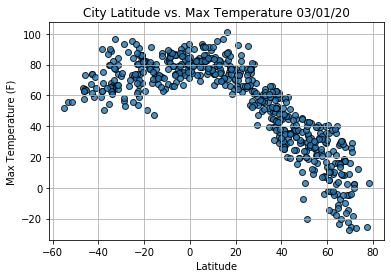

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

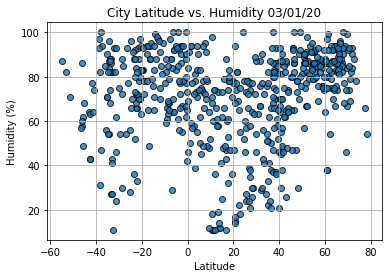

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

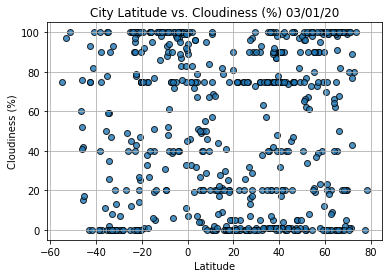

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()